<a href="https://colab.research.google.com/github/GJSingh/info-retrieval/blob/master/pokemon_v2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'dataset_pokemon/pokemon/'
path = Path(base_dir)
#path = base_dir + 'train'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
path

PosixPath('/content/gdrive/My Drive/dataset_pokemon/pokemon')

In [0]:
tfms = get_transforms(do_flip=False)

path = Path(base_dir + 'dataset_pokemon/pokemon')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
#data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size = 26)
data = (ImageList.from_folder(path).split_by_rand_pct() .label_from_folder() .transform(tfms, size=224) .databunch())

In [0]:
type(data)

fastai.vision.data.ImageDataBunch

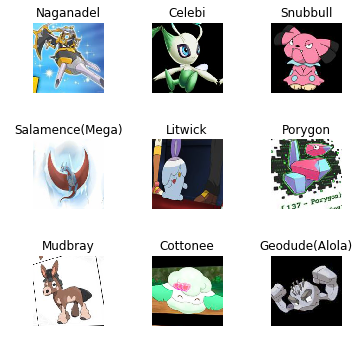

In [0]:
data.show_batch(rows=3, figsize=(5,5))

In [0]:
print(data.classes)
len(data.classes), data.c

['Abomasnow', 'Abomasnow(Mega)', 'Abra', 'Absol', 'Absol(Mega)', 'Accelgor', 'Aegislash', 'Aerodactyl', 'Aerodactyl(Mega)', 'Aggron', 'Aggron(Mega)', 'Aipom', 'Alakazam', 'Alakazam(Mega)', 'Alomomola', 'Altaria', 'Altaria(Mega)', 'Amaura', 'Ambipom', 'Amoonguss', 'Ampharos', 'Ampharos(Mega)', 'Anorith', 'Araquanid', 'Arbok', 'Arcanine', 'Arceus', 'Archen', 'Archeops', 'Ariados', 'Armaldo', 'Aromatisse', 'Aron', 'Articuno', 'Audino', 'Audino(Mega)', 'Aurorus', 'Avalugg', 'Axew', 'Azelf', 'Azumarill', 'Azurill', 'Bagon', 'Baltoy', 'Banette', 'Banette(Mega)', 'Barbaracle', 'Barboach', 'Basculin(Blue-Striped)', 'Basculin(Red-Striped)', 'Bastiodon', 'Bayleef', 'Beartic', 'Beautifly', 'Beedrill', 'Beedrill(Mega)', 'Beheeyem', 'Beldum', 'Bellossom', 'Bellsprout', 'Bergmite', 'Bewear', 'Bibarel', 'Bidoof', 'Binacle', 'Bisharp', 'Blacephalon', 'Blastoise', 'Blastoise(Mega)', 'Blaziken', 'Blaziken(Mega)', 'Blissey', 'Blitzle', 'Boldore', 'Bonsly', 'Bouffalant', 'Bounsweet', 'Braixen', 'Braviary'

(926, 926)

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:07<00:00, 11490551.02it/s]


In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,5.634837,4.380448,0.744508,1:21:45
1,2.469713,1.574872,0.335639,04:01
2,1.431147,1.095376,0.235557,04:01
3,0.958736,1.032273,0.223352,04:04


In [10]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,4.015066,3.226183,0.542311,47:27


In [0]:
learn.save('stage-1')

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


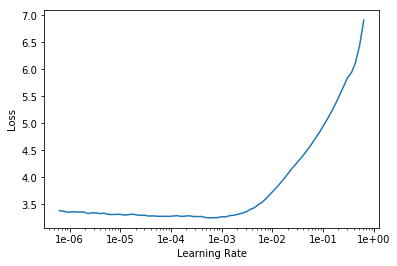

In [13]:
learn.recorder.plot()

In [14]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate,time
0,3.081718,2.948707,0.483727,04:10
1,2.860351,2.812681,0.457893,04:08


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_top_losses(9, figsize=(15,11))